In [2]:
# 📦 Import Dependencies
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from src.model import LSTMModel
from src.data_loader import load_and_prepare_data

# 🔁 Load Dataset
df = pd.read_csv("data/simulated_indian_5g.csv")
df.head()


,timestamp,latitude,longitude,mobility,RSSI,SINR,RSRP,RSRQ,bandwidth
0,2023-01-01 00:00:00,25.970960,78.766626,60,-88.581846,3.184706,-93.879103,-10.772010,77.020695
1,2023-01-01 00:00:01,24.645264,87.832291,100,-99.341826,12.907583,-97.259184,-13.457168,132.575435
2,2023-01-01 00:00:02,25.805031,78.212564,0,-87.473324,11.533718,-83.642128,-7.345614,297.383644
3,2023-01-01 00:00:03,24.676096,74.084266,60,-79.519158,16.396049,-103.241249,-11.115046,231.302820
4,2023-01-01 00:00:04,19.486387,77.412811,60,-81.774221,28.142895,-90.121944,-8.029368,422.509265


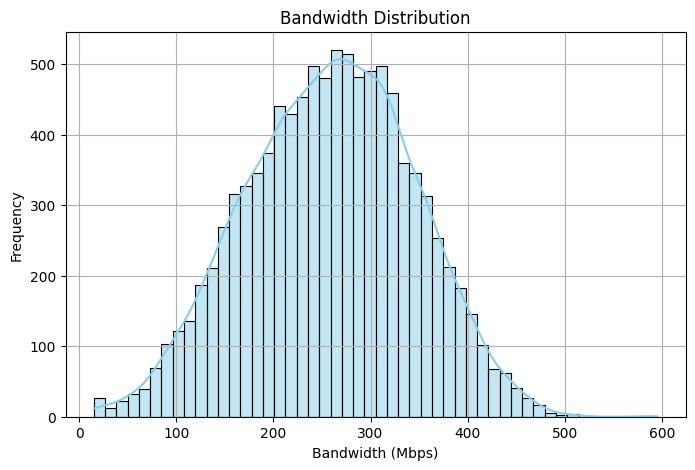

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df["bandwidth"], bins=50, kde=True, color="skyblue")
plt.title("Bandwidth Distribution")
plt.xlabel("Bandwidth (Mbps)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


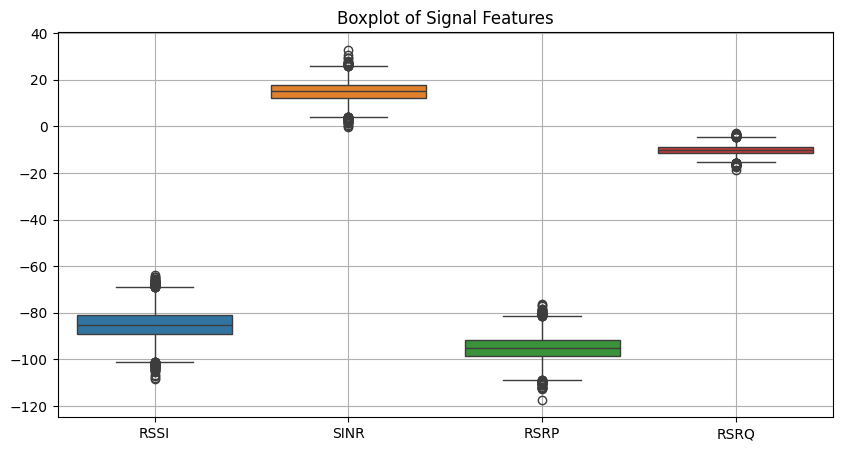

In [4]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["RSSI", "SINR", "RSRP", "RSRQ"]])
plt.title("Boxplot of Signal Features")
plt.grid(True)
plt.show()


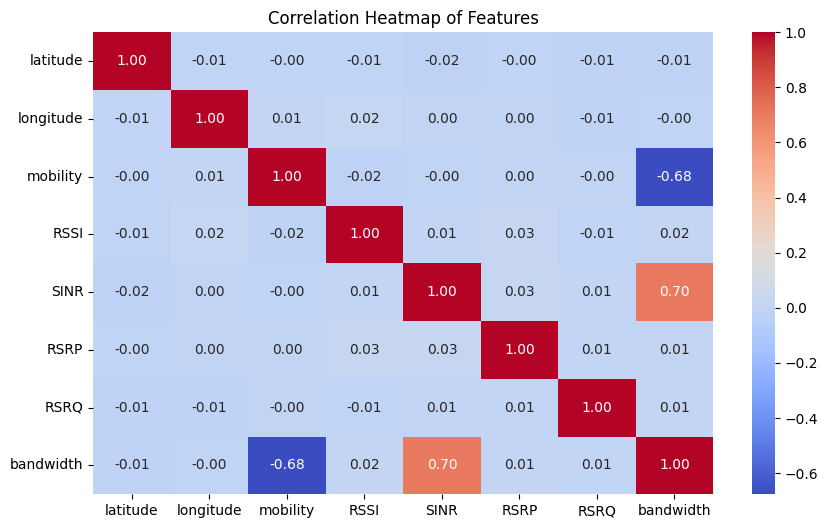

In [10]:
plt.figure(figsize=(10, 6))

# Drop non-numeric column
numeric_df = df.drop(columns=["timestamp"])

# Calculate and plot correlation
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


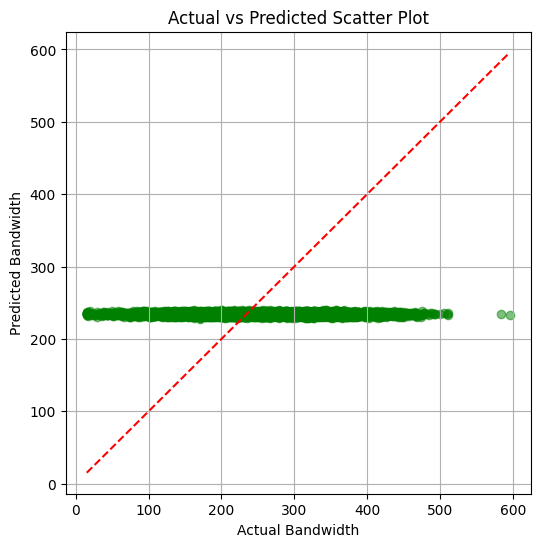

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(y_real, pred_real, alpha=0.5, color='green')
plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
plt.xlabel("Actual Bandwidth")
plt.ylabel("Predicted Bandwidth")
plt.title("Actual vs Predicted Scatter Plot")
plt.grid(True)
plt.show()


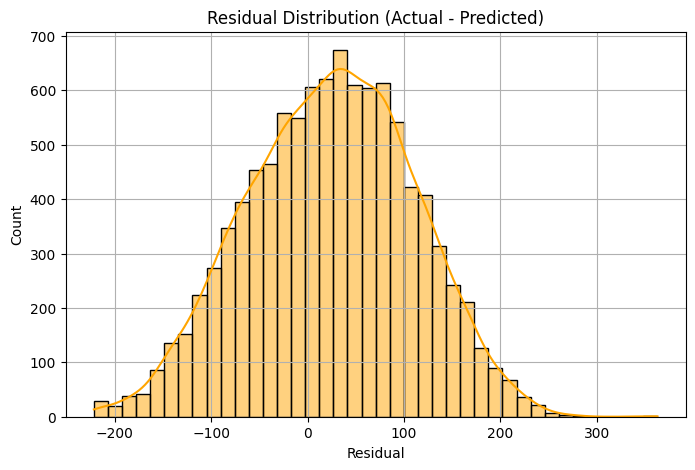

In [8]:
residuals = y_real - pred_real
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=40, kde=True, color='orange')
plt.title("Residual Distribution (Actual - Predicted)")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


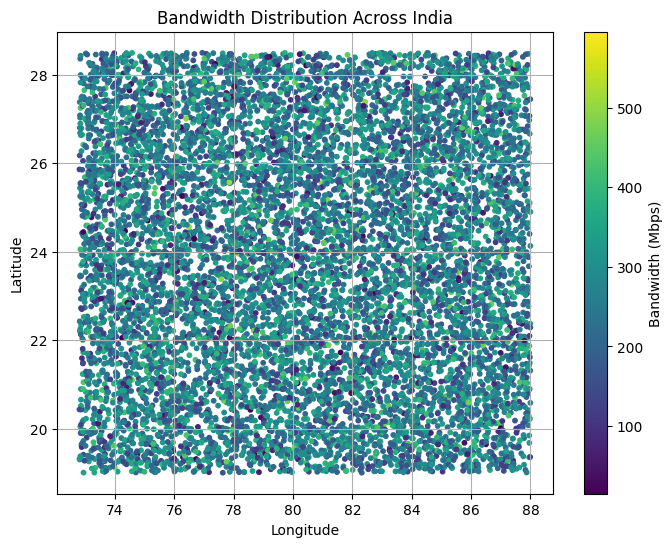

In [9]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["longitude"], df["latitude"], c=df["bandwidth"], cmap="viridis", s=10)
plt.colorbar(scatter, label="Bandwidth (Mbps)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Bandwidth Distribution Across India")
plt.grid(True)
plt.show()
